In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv')

In [38]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [39]:
pip install scikit-learn

In [40]:
# las variables independientes (X) son auxiliares para la predicción de la variable dependiente (Y)
X = data[['CO', 'NOX', 'PM25', 'SO2']]
y = data['PM10']
# 80% (es aproximado, podrían ser 70%) de los datos son los que entrenan el modelo, el 20% restante sirve para validar si la predicción del modelo es acertada o no

In [41]:
split_index = int(len(data) * 0.8)

X_train = X.iloc[:split_index]    # Se toman los datos desde el inicio hasta split_index
X_test = X.iloc[split_index:]   # Se toman los datos desde split_index hasta el final
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)   # Aquí se entrena al modelo. Encuentra los parámetros \beta que aproxima la mejor recta


LinearRegression()

In [44]:
y_pred = model.predict(X_test)    # Se evalúa  el modelo en el 20% que ya se tenía. Es decir, se predice el 20% que faltaba. Se comparará con los datos reales

In [45]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficientes': model.coef_
})

In [46]:
print(coeficientes)   # Da el \beta_1

  Variable  Coeficientes
0       CO    -21.240472
1      NOX      0.530047
2     PM25      1.341258
3      SO2      0.122226


In [47]:
print(f"Intercepto: {model.intercept_}")    # Esto dae el \beta_0

Intercepto: 2.542471488012616


In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)   # Aplica la métrica r2. Se compara el 20% predicho con los valores reales
r2

0.7494314866330515

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

7.149329038511094

In [50]:
mae = mean_absolute_error(y_test, y_pred)
mae

5.463133609444374

In [51]:
y_pred

array([31.38002881, 37.86450851, 32.04174414, 26.0631386 , 33.5333308 ,
       42.05139907, 40.14043928, 29.99883337, 36.74335268, 21.76294946,
       19.3049341 , 17.56171307, 23.44982476, 29.76943116, 29.36952081,
       34.52061101, 20.06627078, 34.39087261, 33.08816623, 34.58422105,
       40.05360016, 35.45067444, 23.9899229 , 13.97945307, 30.74979421,
       35.30842121, 49.41866435, 23.17090231, 22.36419371, 39.87602679,
       22.72771426, 35.22740105, 33.26176002, 27.6873052 , 46.75531003,
       53.96682474, 47.14756127, 38.33097827, 40.52208719, 35.34494686,
       46.00862321, 47.72503412, 43.38116545, 39.30906491, 30.53299751,
       41.29068002, 52.48091463, 52.25544764, 42.34265178, 34.80613239,
       31.28221483, 30.38697676, 31.17733714, 44.00940911, 46.81459584,
       45.92792275, 26.58188832, 32.50082829, 34.72659384, 32.48913447,
       26.32497217, 38.62973209, 51.37690293, 37.44124484, 52.56188205,
       49.66050962, 47.99784311, 48.7994119 , 42.63969231, 36.32

In [52]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frecuencia')

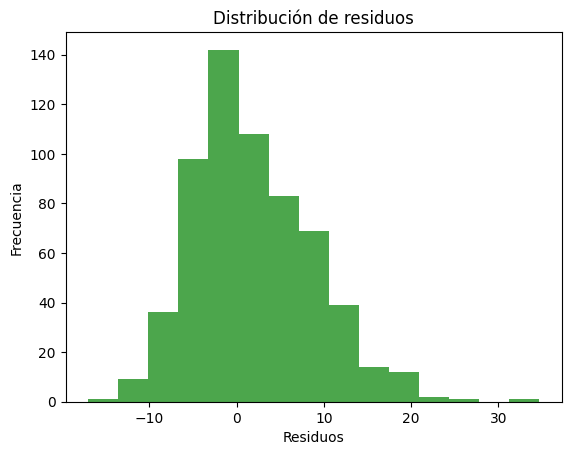

In [53]:
residuos = y_test - y_pred

plt.hist(residuos, bins = 15, color = 'green', alpha = 0.7)
plt.title('Distribución de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

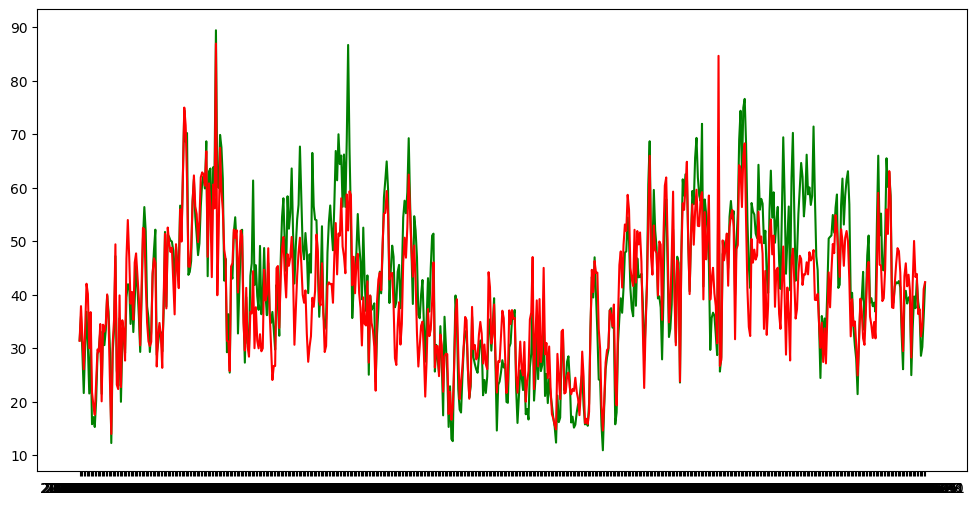

In [54]:
plt.figure(figsize = (12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle = '-', color = 'green')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle = '-', color = 'red')

In [55]:
# Notar que al haber agregado las PM25, SO2 y NOX, la predicción ha ido mejorando notablemente

RANDOM FOREST. Se basa en árboles de decisión
Aprende aleatoriamente de todos los datos que se le den, no solo de un conjunto en particular

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [57]:
data = data.sort_values(by = 'fecha')
split_index = int(len(data) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [58]:
rf_model = RandomForestRegressor(n_estimators = 100, max_depth = 5, random_state = 42)   # No se llaman parámetros, sino hiperparámetros
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [59]:
y_pred = rf_model.predict(X_test)
y_pred

array([28.88732769, 36.89959766, 33.02526754, 23.91107727, 31.83564405,
       38.32415473, 37.07564616, 31.19183875, 34.49386289, 24.8293755 ,
       19.04664864, 17.22562146, 23.66365344, 29.79699895, 26.0536494 ,
       37.98739288, 20.67003393, 34.39741255, 33.4860101 , 34.6827887 ,
       35.66098532, 31.07730372, 25.08222895, 14.55978023, 26.72487049,
       34.37582788, 52.61109496, 23.74800523, 20.69457046, 38.02812173,
       23.20074967, 35.58465697, 34.35234663, 23.29143954, 43.59994021,
       51.62207981, 44.70624945, 37.48101032, 38.4449868 , 31.31021658,
       46.2884486 , 43.94614071, 39.00842244, 35.337997  , 27.53095287,
       37.13844747, 48.55619297, 50.30704694, 41.32610217, 27.63345022,
       30.25127585, 29.68930879, 26.285591  , 45.91498098, 46.57012667,
       44.33759957, 24.72631036, 29.58269647, 31.42532596, 30.52532577,
       24.78046821, 39.56246673, 48.71286376, 36.8444688 , 49.31841286,
       51.49569474, 47.65053658, 46.96971278, 42.49015189, 35.17

In [61]:
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficientes': rf_model.feature_importances_
})
print(coeficientes)

  Variable  Coeficientes
0       CO      0.007722
1      NOX      0.069983
2     PM25      0.914210
3      SO2      0.008085


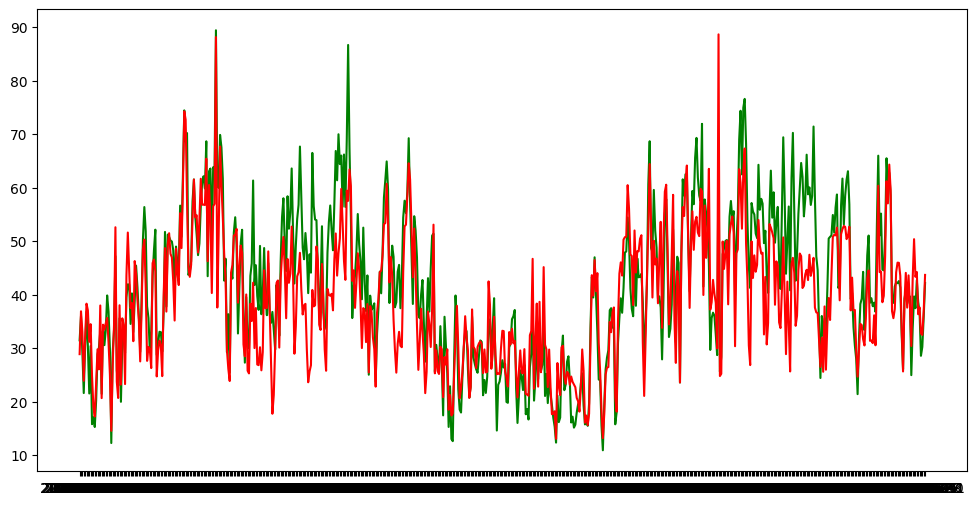

In [62]:
plt.figure(figsize = (12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, linestyle = '-', color = 'green')
plt.plot(data.iloc[split_index:]['fecha'], y_pred, linestyle = '-', color = 'red')